# I. Introduction

This exercise investigates sorting times using various sort methods.  

First we import helpful packages.

In [70]:
import random
import string
import time
import pandas as pd
import seaborn as sns
%matplotlib inline

# II. Defining the Sort Functions

Next I leveraged the starter code from our course materials to define the quick sort function.  The code was edited to take a list of dictionaries (representing rows in a ~dataframe) and the dictionary 'key' on which to sort the list (rows).

In [71]:
def quickSort(list_of_dicts, key):  
  # base case, arrays with 0 or 1 element are already "sorted"
  if len(list_of_dicts) < 2:
    return list_of_dicts
  else:
    # assigns pivot element
    pivot_element = list_of_dicts[0]
    # creates sub-array of all the elements less than the identified pivot
    less = [i for i in list_of_dicts[1:] if i[key] <= pivot_element[key]]
    # creates sub-array of all the elements greater than the identified pivot
    greater = [i for i in list_of_dicts[1:] if i[key] > pivot_element[key]]
    # recursive call of quicksort on the less-than and greater-than arrays (nesting the pivot in between)
    return quickSort(less,key) + [pivot_element] + quickSort(greater,key)

Next I leveraged documentation and code from geeksforgeeks.org to define similar functions employing the following sort methodologies:
1. Selection Sort
2. Bubble Sort
3. Insertion Sort
4. Strand Sort
5. Gnome Sort

In [72]:
def selectionSort(list_of_dicts, key):
  for i in range(len(list_of_dicts)): 
    min_index = i 
    min_value = list_of_dicts[i][key]
    # cycles through remaining array to find next min value
    for j in range(i+1, len(list_of_dicts)): 
        if list_of_dicts[j][key] < min_value: 
            min_index = j 
            min_value = list_of_dicts[j][key]
    # Swap the first element and the minimum element within the remaining unsorted portion of the array
    list_of_dicts[i], list_of_dicts[min_index] = list_of_dicts[min_index], list_of_dicts[i] 
  return list_of_dicts

In [73]:
def bubbleSort(list_of_dicts,key): 
  n = len(list_of_dicts) 
  # Traverse through all array elements 
  for i in range(n): 
      # Last i elements are already in place 
      for j in range(0, n-i-1): 
          # traverse the array from 0 to n-i-1 
          # Swap if the element found is greater 
          # than the next element 
          if list_of_dicts[j][key] > list_of_dicts[j+1][key] : 
              list_of_dicts[j], list_of_dicts[j+1] = list_of_dicts[j+1], list_of_dicts[j] 
  return list_of_dicts

In [74]:
def insertionSort(list_of_dicts, key): 
  # Traverse through 1 to len(arr) 
  for i in range(1, len(list_of_dicts)): 
      comp_element = list_of_dicts[i]
      # Move elements of arr[0..i-1], that are 
      # greater than key, to one position ahead 
      # of their current position 
      j = i-1
      while j >=0 and comp_element[key] < list_of_dicts[j][key] : 
              list_of_dicts[j+1] = list_of_dicts[j] 
              j -= 1
      list_of_dicts[j+1] = comp_element 
  return list_of_dicts

In [75]:
# Defines merge of pre-sorted lists first
def my_merge(l1, l2, key):
  result = []
  while (l1 and l2):
    if (l1[0][key] <= l2[0][key]):
        result.append(l1.pop(0))
    else:
        result.append(l2.pop(0))
  # Add the remaining of the lists
  result.extend(l1 if l1 else l2)
  return result

def strandSort(list_of_dicts,key):
  if len(list_of_dicts) < 2:
    return list_of_dicts 
  result_list_of_dicts = []
  while len(list_of_dicts)>0:
    i = 0
    sublist = [list_of_dicts.pop(0)]
    while i < len(list_of_dicts):
      if list_of_dicts[i][key] > sublist[-1][key]:
        sublist.append(list_of_dicts.pop(i))
      else:
        i = i + 1
    result_list_of_dicts = my_merge(sublist,result_list_of_dicts,key)
  return result_list_of_dicts

In [76]:
def gnomeSort(list_of_dicts,key): 
  index = 1
  while index < len(list_of_dicts): 
    if index == 0: 
        index = index + 1
    if list_of_dicts[index][key] >= list_of_dicts[index - 1][key]: 
        index = index + 1
    else: 
        list_of_dicts[index], list_of_dicts[index-1] = list_of_dicts[index-1], list_of_dicts[index] 
        index = index - 1
  return list_of_dicts 

I used the following tests to ensure all functions are working properly:

In [77]:
# Functional testing of quicksort, bubblesort, gnomesort, insertionsort, selectionsort, and strandsort functions
test_list_of_dicts = [{'first_name':'Sarah', 'last_name':'Martin', 'city':'NYC'}
                       , {'first_name':'Rachel', 'last_name':'Martin', 'city':'Berlin'}
                       , {'first_name':'David', 'last_name':'Martin', 'city':'Stamford'}]
quickSort(test_list_of_dicts,'city')

[{'first_name': 'Rachel', 'last_name': 'Martin', 'city': 'Berlin'},
 {'first_name': 'Sarah', 'last_name': 'Martin', 'city': 'NYC'},
 {'first_name': 'David', 'last_name': 'Martin', 'city': 'Stamford'}]

In [78]:
test_list_of_dicts = [{'first_name':'Sarah', 'last_name':'Martin', 'city':'NYC'}
                       , {'first_name':'Rachel', 'last_name':'Martin', 'city':'Berlin'}
                       , {'first_name':'David', 'last_name':'Martin', 'city':'Stamford'}]
bubbleSort(test_list_of_dicts,'city')

[{'first_name': 'Rachel', 'last_name': 'Martin', 'city': 'Berlin'},
 {'first_name': 'Sarah', 'last_name': 'Martin', 'city': 'NYC'},
 {'first_name': 'David', 'last_name': 'Martin', 'city': 'Stamford'}]

In [79]:
test_list_of_dicts = [{'first_name':'Sarah', 'last_name':'Martin', 'city':'NYC'}
                       , {'first_name':'Rachel', 'last_name':'Martin', 'city':'Berlin'}
                       , {'first_name':'David', 'last_name':'Martin', 'city':'Stamford'}]
gnomeSort(test_list_of_dicts,'city')

[{'first_name': 'Rachel', 'last_name': 'Martin', 'city': 'Berlin'},
 {'first_name': 'Sarah', 'last_name': 'Martin', 'city': 'NYC'},
 {'first_name': 'David', 'last_name': 'Martin', 'city': 'Stamford'}]

In [80]:
test_list_of_dicts = [{'first_name':'Sarah', 'last_name':'Martin', 'city':'NYC'}
                       , {'first_name':'Rachel', 'last_name':'Martin', 'city':'Berlin'}
                       , {'first_name':'David', 'last_name':'Martin', 'city':'Stamford'}]
insertionSort(test_list_of_dicts,'city')

[{'first_name': 'Rachel', 'last_name': 'Martin', 'city': 'Berlin'},
 {'first_name': 'Sarah', 'last_name': 'Martin', 'city': 'NYC'},
 {'first_name': 'David', 'last_name': 'Martin', 'city': 'Stamford'}]

In [81]:
test_list_of_dicts = [{'first_name':'Sarah', 'last_name':'Martin', 'city':'NYC'}
                       , {'first_name':'Rachel', 'last_name':'Martin', 'city':'Berlin'}
                       , {'first_name':'David', 'last_name':'Martin', 'city':'Stamford'}]
selectionSort(test_list_of_dicts,'city')

[{'first_name': 'Rachel', 'last_name': 'Martin', 'city': 'Berlin'},
 {'first_name': 'Sarah', 'last_name': 'Martin', 'city': 'NYC'},
 {'first_name': 'David', 'last_name': 'Martin', 'city': 'Stamford'}]

In [82]:
test_list_of_dicts = [{'first_name':'Sarah', 'last_name':'Martin', 'city':'NYC'}
                       , {'first_name':'Rachel', 'last_name':'Martin', 'city':'Berlin'}
                       , {'first_name':'David', 'last_name':'Martin', 'city':'Stamford'}]
strandSort(test_list_of_dicts,'city')

[{'first_name': 'Rachel', 'last_name': 'Martin', 'city': 'Berlin'},
 {'first_name': 'Sarah', 'last_name': 'Martin', 'city': 'NYC'},
 {'first_name': 'David', 'last_name': 'Martin', 'city': 'Stamford'}]

All good!

# III. Generating the Test Data

To generate the test data I generated each component (column) individually:
1. Addresses (state abbreviations)
2. First names
3. Last names

In [83]:
# Instantiates (currently sorted) list of state abbrebiations
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

# Randomly shuffles states list
random.seed(2)
random.shuffle(states)
states

['MO',
 'ND',
 'WY',
 'OK',
 'CT',
 'KS',
 'CA',
 'MN',
 'GA',
 'NJ',
 'OH',
 'MI',
 'ME',
 'SC',
 'NE',
 'MA',
 'DE',
 'UT',
 'LA',
 'WV',
 'NM',
 'SD',
 'IL',
 'OR',
 'IA',
 'ID',
 'AL',
 'AK',
 'NY',
 'FL',
 'VT',
 'NH',
 'WA',
 'NC',
 'MT',
 'NV',
 'VA',
 'PA',
 'AZ',
 'TN',
 'IN',
 'RI',
 'KY',
 'MD',
 'TX',
 'HI',
 'MS',
 'WI',
 'CO',
 'AR']

In [84]:
# Generates 50 randomly generated 10-character string as 'first names' and separately, 'last names'
random.seed(3)
first_names = ["".join(random.choices(string.ascii_lowercase, k=10)) for _ in range(50)]
random.seed(4)
last_names = ["".join(random.choices(string.ascii_lowercase, k=10)) for _ in range(50)]

A quick check to ensure there are no dupes within each list of names:

In [85]:
len(first_names) == len(set(first_names))
len(last_names) == len(set(last_names))

True

Confirmed!

Lastly, I combined the lists into a dictionary of 3 lists (with 50 elements each) and then converted it to a list of 50 dictionaries (with 3 key-value pairs each) to represent the rows of a table

In [86]:
persons_dict = {'first_name':first_names, 'last_name':last_names, 'address':states}
persons_list = pd.DataFrame(persons_dict).to_dict('records')

# IV. Sort Method Time Testing

First, because of in-place sorting or elimination of the original data via pop commands, I created 12 copies of the test data: 2 for each sort method

In [87]:
persons_list_quick1 = persons_list.copy()
persons_list_bubble1 = persons_list.copy()
persons_list_gnome1 = persons_list.copy()
persons_list_insertion1 = persons_list.copy()
persons_list_selection1 = persons_list.copy()
persons_list_strand1 = persons_list.copy()

persons_list_quick2 = persons_list.copy()
persons_list_bubble2 = persons_list.copy()
persons_list_gnome2 = persons_list.copy()
persons_list_insertion2 = persons_list.copy()
persons_list_selection2 = persons_list.copy()
persons_list_strand2 = persons_list.copy()

Next I instantiated a list to capture the results of the time testing

In [88]:
time_results = []

To generate the time results, I created a function that takes 4 arguments:
1. the sort function to use on the data
2. what to call the sort method when saving the results
3. the first list of dictionaries to use (to sort according to last name)
4. the second list of dictionaries to use (to sort according to address/state)

The time test function times each sort -- by last name, and then by address/state -- and saves both results as well as a average of the two sort times.  It also returns the results from both sorts for validation purposes.

In [89]:
def time_testing(sort_method,method_label,data1,data2):
  start1 = time.perf_counter()
  by_last_name = sort_method(data1,'last_name')
  end1 = time.perf_counter()
  start2 = time.perf_counter()
  by_address = sort_method(data2,'address')
  end2 = time.perf_counter()
  first_sort_time = (end1 - start1)*1000
  second_sort_time = (end2 - start2)*1000
  time_results.append({'Method':method_label
                      ,'Sort Key':'Last Name'
                      ,'Sort Time':first_sort_time})
  time_results.append({'Method':method_label
                      ,'Sort Key':'Address'
                      ,'Sort Time':second_sort_time})
  time_results.append({'Method':method_label
                      ,'Sort Key':'Average'
                      ,'Sort Time':(first_sort_time + second_sort_time)/2})
  return by_last_name, by_address

Finally, I run the time testing for each of the 6 sort functions I defined earlier:
1. Quick Sort
2. Bubble Sort
3. Gnome Sort
4. Insertion Sort
5. Selection Sort
6. and Strand Sort

... and save the time results to a pandas DataFrame.

In [90]:
last_name_quick_result, address_quick_result = time_testing(quickSort,'Quick Sort',persons_list_quick1,persons_list_quick2)
last_name_bubble_result, address_bubble_result = time_testing(bubbleSort,'Bubble Sort',persons_list_bubble1,persons_list_bubble2)
last_name_gnome_result, address_gnome_result = time_testing(gnomeSort,'Gnome Sort',persons_list_gnome1,persons_list_gnome2)
last_name_insertion_result, address_insertion_result = time_testing(insertionSort,'Insertion Sort',persons_list_insertion1,persons_list_insertion2)
last_name_selection_result, address_selection_result = time_testing(selectionSort,'Selection Sort',persons_list_selection1,persons_list_selection2)
last_name_strand_result, address_strand_result = time_testing(strandSort,'Strand Sort',persons_list_strand1,persons_list_strand2)

results_df = pd.DataFrame(time_results)

Now to confirm that sorted data match...  

In [91]:
last_name_quick_result == last_name_bubble_result == last_name_gnome_result == last_name_insertion_result == last_name_selection_result == last_name_strand_result

True

In [92]:
address_quick_result == address_bubble_result == address_gnome_result == address_insertion_result == address_selection_result == address_strand_result

True

# V. Results Visualizations & Discussion

Next we graph the results looking at categorical scatterplots of the data for the last name sort, the address sort, and the average of the two, color-coded by which sort function/method was used (e.g. Bubble, Gnome, Strand, etc.)

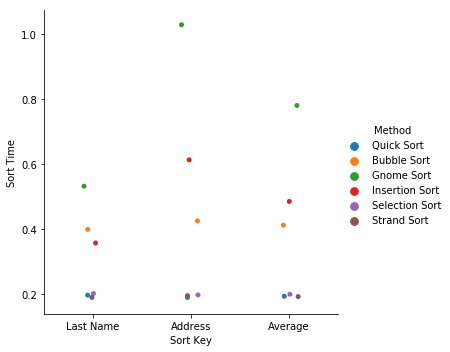

In [93]:
sns.catplot(x="Sort Key", y="Sort Time"
            , hue = "Method", data=results_df)

Firstly, it is clear that Gnome Sort is pretty consistently the slowest method.  

Next slowest are Bubble Sort and Insertion Sort.  When running this notebook (from section III) repeatedly, there is still volatility in the sort times captured.  Sometimes Bubble Sort is faster than Insertion Sort, but it looks like more often than not, Insertion Sort is slightly faster (and has more volatile run-times).

Either way, the rest of the sorting methods have more similar run-times, so I decided to produce the same visualization with these 3 slowest sort methodologies removed so I could see the differences in run-times between the other sort methodologies more clearly.

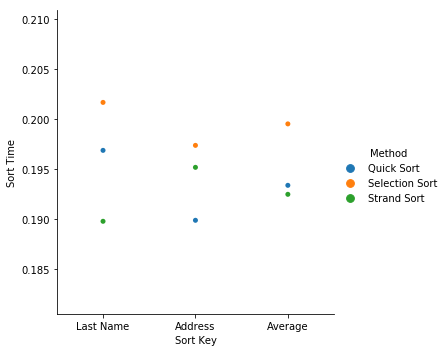

In [95]:
sns.catplot(x="Sort Key", y="Sort Time"
            , hue = "Method", jitter = False
            , data=results_df.loc[~results_df['Method'].isin(['Gnome Sort','Bubble Sort','Insertion Sort'])])

From this graph it is clearly that Selection Sort is the next slowest method.  

Similar to the volatility between Bubble Sort and Insertion Sort stated above, Strand Sort and Quick Sort are the two fastest methodologies with this dataset but which is faster can sometimes be hard to tell.  Again, while sometimes Strand Sort is faster, it looks as though when the latter sections of this notebook are run repeatedly, Quick Sort is more often the faster of the two.

# VI. Executive Summary

Luckily, I was able to get slightly less volatile run-time results using the time.perf_counter() function compared to previous assignments, allowing me to see relatively clearly which sort methodologies are generally faster or slower.  My ranking of run-times with this specific dataset from fastest to slowest would be:
1. Quick Sort
2. Strand Sort (just a hair behind Quick Sort)
3. Selection Sort
4. Insertion Sort
5. Bubble Sort (just a hair behind Insertion Sort)
6. Gnome Sort

These results are mostly expected.  From the documentation on these sort methodologies from https://www.geeksforgeeks.org/, I would expect Gnome sort to be the slowest, with Bubble Sort not far behind, and I would expect (given it's reputation and its name!) that Quick Sort would be the fastest.

The only result that really surprised me was how close the Strand Sort run-times were to the Quick Sort run-times.  Given that Strand Sort is not as well-known as Quick Sort, I was suprised to see that it performed quite well.

However, because these sorting techniques were all applied to the exact same data (of consistent size), it is difficult (re: impossible) to validate the Big O classifications for each of the sorting techniques.  Only by increasing (and/or decreasing) the size of our test data would we be able to validate what we know about Big O for each of these sorting methodologies.

Personally, I'd be interested to see how the Strand Sort methodologies scales compared to the very famous Quick Sort methodology.